In [1]:
from codes.python import load_DF_beats as DF
import numpy as np
from codes.python import metric
from codes.python import features_columns as col
from codes. python import post_process_features_ex as post_features
import pandas as pd
from codes.python import TunedClassifier as classifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import svm, metrics



ls = []
ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
ls2.extend(["['N']","['L']", "['R']"])                    # N
ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls2.extend(["['V']", "['E']"])                         # VEB
ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


good_features_X = np.asarray(pd.read_csv("database/gooddata_X_train_no_outliers.csv").iloc[:,1:263])
good_features_y = np.asarray(pd.read_csv("database/gooddata_y_train_no_outliers.csv").iloc[:,1])

rank = pd.read_csv("database/features_ranking.py").sort_values(['rfscore', 'features'], ascending=[0,1])

rank_n_f = pd.read_csv("database/features_n_vs_f_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_n_s = pd.read_csv("database/features_n_vs_s_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_n_v = pd.read_csv("database/features_n_vs_v_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_s_f = pd.read_csv("database/features_s_vs_f_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_s_v = pd.read_csv("database/features_s_vs_v_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_v_f = pd.read_csv("database/features_v_vs_f_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])







import pickle
f = open('database/nvs_lin.text', 'rb')
n_s_ln = pickle.load(f)[1]
f.close()

f = open('database/nvv_lin.text', 'rb')
n_v_ln = pickle.load(f)[1]
f.close()

f = open('database/nvf_lin.text', 'rb')
n_f_ln = pickle.load(f)[1]
f.close()

f = open('database/svv_lin.text', 'rb')
s_v_ln = pickle.load(f)[1]
f.close()

f = open('database/svf_lin.text', 'rb')
s_f_ln = pickle.load(f)[1]
f.close()

f = open('database/vvf_lin.text', 'rb')
v_f_ln = pickle.load(f)[1]
f.close()

import pickle
f = open('database/nvs_log.text', 'rb')
n_s_log = pickle.load(f)[1]
f.close()

f = open('database/nvv_log.text', 'rb')
n_v_log = pickle.load(f)[1]
f.close()

f = open('database/nvf_log.text', 'rb')
n_f_log = pickle.load(f)[1]
f.close()

f = open('database/svv_log.text', 'rb')
s_v_log = pickle.load(f)[1]
f.close()

f = open('database/svf_log.text', 'rb')
s_f_log = pickle.load(f)[1]
f.close()

f = open('database/vvf_log.text', 'rb')
v_f_log = pickle.load(f)[1]
f.close()



score = 0.01
score_n_s = 0.01
score_n_f = 0.015
score_n_v = 0.01
score_s_f = 0.01
score_s_v = 0.015
score_v_f = 0.01
feature_good = rank[rank['rfscore'] >= score]['features'].values
n_s = rank_n_s[rank_n_s['rfscore'] >= score_n_s]['features'].values
n_f = rank_n_f[rank_n_f['rfscore'] >= score_n_f]['features'].values
n_v = rank_n_v[rank_n_v['rfscore'] >= score_n_v]['features'].values
s_f = rank_s_f[rank_s_f['rfscore'] >= score_s_f]['features'].values
s_v = rank_s_v[rank_s_v['rfscore'] >= score_s_v]['features'].values
v_f = rank_v_f[rank_v_f['rfscore'] >= score_v_f]['features'].values

In [2]:
np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )
np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

features_clinic,c_ID,f_M, f_V, f_d , norm_mlii, norm_v1 , norm_dtw = col.get_columns()

#X_train_under = pd.DataFrame(under_X_train,columns=features_clinic)
X_train_balanced = pd.DataFrame(good_features_X,columns=features_clinic)
X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

In [6]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

In [3]:
transformer = SparseRandomProjection(n_components = 10, eps=0.1)
transformer.fit(X_train[n_s])
X_new = transformer.transform(X_train[n_s])
X_new_test = transformer.transform(X_test[n_s])

transformer = GaussianRandomProjection(n_components = 10, eps=0.1)
transformer.fit(X_train[n_s])
X_new_g = transformer.transform(X_train[n_s])
X_new_test_g = transformer.transform(X_test[n_s])

NameError: name 'SparseRandomProjection' is not defined

In [4]:


y=classifier.randomForest(X_train[v_f_log], y_train, X_test[v_f_log], y_test, jk=True,labels=[0,1,2,3])[2]
y7=classifier.Linear_D(X_train[n_f_log], y_train, X_test[n_f_log], y_test, jk=True,labels=[0,1,2,3])[2]
y6=classifier.logisticRegress(X_train[n_f_log], y_train, X_test[n_f_log], y_test, jk=True,labels=[0,1,2,3])[2]


[[39141  1863   574  2443]
 [ 1453    96   498     3]
 [  158    21  2979    62]
 [   28    77     8   275]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     44021
           1       0.05      0.05      0.05      2050
           2       0.73      0.93      0.82      3220
           3       0.10      0.71      0.17       388

   micro avg       0.86      0.86      0.86     49679
   macro avg       0.46      0.64      0.49     49679
weighted avg       0.90      0.86      0.87     49679

[0.4543705692204176, 1.7525790674016555, 0.4462576680354157]
[[39761    21   123  4116]
 [ 2004     1     5    40]
 [  343    80  2420   377]
 [   23     0     6   359]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     44021
           1       0.01      0.00      0.00      2050
           2       0.95      0.75      0.84      3220
           3       0.07      0.93      0.14       388

   micro avg  

In [28]:
t

[[38931    36   724  4330]
 [ 2001     1     5    43]
 [  379     4  2524   313]
 [   18     0     9   361]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     44021
           1       0.02      0.00      0.00      2050
           2       0.77      0.78      0.78      3220
           3       0.07      0.93      0.13       388

   micro avg       0.84      0.84      0.84     49679
   macro avg       0.45      0.65      0.46     49679
weighted avg       0.89      0.84      0.86     49679

[0.38599561474911454, 1.5824874108682974, 0.39080873373309444]
[[38690  1041  2932  1358]
 [ 1805   182    18    45]
 [  494   139  2208   379]
 [  206     1   111    70]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     44021
           1       0.13      0.09      0.11      2050
           2       0.42      0.69      0.52      3220
           3       0.04      0.18      0.06       388

   micro avg

In [27]:
len(v_f_log)

20

In [25]:
transformer = SparseRandomProjection(n_components = 10, eps=0.1)
transformer.fit(X_train[n_s])
X_new = transformer.transform(X_train[n_s])
X_new_test = transformer.transform(X_test[n_s])

y2 = classifier.logisticRegress(X_new, y_train, X_new_test, y_test, jk=False,labels=[0,1,2,3])[2]

transformer = SparseRandomProjection(n_components = 15, eps=0.1)
transformer.fit(X_train[n_s])
X_new = transformer.transform(X_train[n_s])
X_new_test = transformer.transform(X_test[n_s])

y5 = classifier.logisticRegress(X_new, y_train,X_new_test, y_test, jk=False,labels=[0,1,2,3])[2]


inds2 = []
for i in range(len(y2)):
    #avg.append(np.mean([y[i], y1[i], y2[i], y3[i], y4[i], y4[i],y5[i], y6[i], y7[i], y8[i]]))
    #avg.append(round(np.mean([y[i],y3[i], y4[i],  y5[i],  y6[i]]),0))
    #print(np.mean(  [y5[i],  y6[i]]))
   # indes.append(voting( [y5[i],y4[i],  y6[i]])
    #inds.append(voting( [y[i],y3[i],  y6[i], y7[i]], focus = 2, amount=2))
    #inds.append(voting( [y[i],y3[i],  y6[i]], focus = 2, amount=2))
    inds2.append(classifier.voting( [y2[i],y5[i]], focus = 1, amount=1, random = True))

    



print(metrics.confusion_matrix(y_test,inds2 , labels=[0,1,2,3]))
print(classification_report(y_test,inds2))

[[41573  1115   957   376]
 [  401  1528   109    12]
 [  353   334  2386   147]
 [  219     1     9   159]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     44021
           1       0.51      0.75      0.61      2050
           2       0.69      0.74      0.71      3220
           3       0.23      0.41      0.29       388

   micro avg       0.92      0.92      0.92     49679
   macro avg       0.60      0.71      0.64     49679
weighted avg       0.93      0.92      0.92     49679

[[41609  1103  1064   245]
 [  419  1470   156     5]
 [  379   352  2394    95]
 [  158     1    26   203]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     44021
           1       0.50      0.72      0.59      2050
           2       0.66      0.74      0.70      3220
           3       0.37      0.52      0.43       388

   micro avg       0.92      0.92      0.92     49679
   macro avg       0.

In [16]:
len(n_s_ln)

20

In [7]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_new)


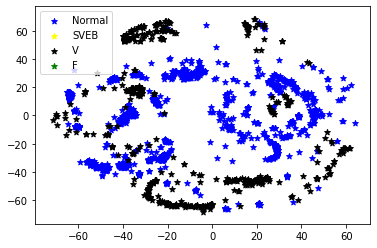

In [58]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

ada=RandomUnderSampler(ratio='not minority')
train, train_labels=ada.fit_sample(X_embedded, y_train)
#test, test_labels=ada.fit_sample(X_test, y_test)

under_X_train = train
#X_test = test
under_y_train = train_labels
#y_test = test_labels
#input_size=X_train.shape[1]

colour = dict(zip(np.unique(y_train), colour))

import matplotlib.pyplot as plt

plt.scatter(X_embedded[2000:4000,0][y_train[2000:4000] == 0], X_embedded[2000:4000,1][y_train[2000:4000] == 0],c='blue', marker='*',label='Normal')
plt.scatter(X_embedded[2000:4000,0][y_train[2000:4000] == 1], X_embedded[2000:4000,1][y_train[2000:4000] == 1],c='yellow', marker='*',label='SVEB')
plt.scatter(X_embedded[2000:4000,0][y_train[2000:4000] == 2], X_embedded[2000:4000,1][y_train[2000:4000] == 2],c='black', marker='*',label='V')
plt.scatter(X_embedded[2000:4000,0][y_train[2000:4000] == 3], X_embedded[2000:4000,1][y_train[2000:4000] == 3],c='Green', marker='*',label='F')

plt.legend()

In [17]:
plt.cm.prism

In [25]:
dict(zip(np.unique(y_train), colour))

{0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[n_s])
transformer = scaler.transform(X_train[n_s])
pca = PCA(n_components = 3)
pca.fit(transformer)
components = pca.transform(transformer)

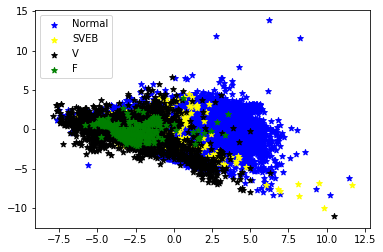

In [73]:
plt.scatter(components[y_train == 0][:,0], components[y_train == 0][:,1],c='blue', marker='*',label='Normal')
plt.scatter(components[y_train == 1][:,0], components[y_train == 1][:,1],c='yellow', marker='*',label='SVEB')
plt.scatter(components[y_train == 2][:,0], components[y_train == 2][:,1],c='black', marker='*',label='V')
plt.scatter(components[y_train == 3][:,0], components[y_train == 3][:,1],c='Green', marker='*',label='F')

plt.legend()
plt.show()
plt.close()



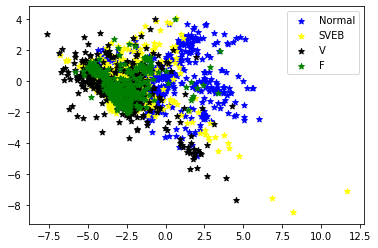

In [75]:
ada=RandomUnderSampler(ratio='not minority')
train, train_labels=ada.fit_sample(components, y_train)
#test, test_labels=ada.fit_sample(X_test, y_test)

under_X_train = train
#X_test = test
under_y_train = train_labels
#y_test = test_labels
#input_size=X_train.shape[1]

plt.scatter(under_X_train[under_y_train == 0][:,0], under_X_train[under_y_train == 0][:,1],c='blue', marker='*',label='Normal')
plt.scatter(under_X_train[under_y_train == 1][:,0], under_X_train[under_y_train == 1][:,1],c='yellow', marker='*',label='SVEB')
plt.scatter(under_X_train[under_y_train == 2][:,0], under_X_train[under_y_train == 2][:,1],c='black', marker='*',label='V')
plt.scatter(under_X_train[under_y_train == 3][:,0], under_X_train[under_y_train == 3][:,1],c='Green', marker='*',label='F')

plt.legend()

In [82]:
# rr, HOS, myMorph training features
train_rr=np.loadtxt('database/rr-train.txt', dtype=float)[:,1:] # extract class labels
train_hos=np.loadtxt('database/hos_train.txt', dtype=float)
train_mmorph=np.loadtxt('database/morph_train.txt', dtype=float)

# rr, HOS, myMorph testing features
test_rr=np.loadtxt('database/rr-test.txt', dtype=float)[:,1:] # extract class labels
test_rr=np.loadtxt('database/rr-test.txt', dtype=float)[:,1:] # extract class labels
test_hos=np.loadtxt('database/hos_test.txt', dtype=float)
test_mmorph=np.loadtxt('database/morph_test.txt', dtype=float)

# training and testing class labels.
train_labels=np.loadtxt('database/labels_train.txt', dtype=str)
test_labels=np.loadtxt('database/labels_test.txt', dtype=str)

# aggregate all features.
train=np.hstack((train_rr, train_mmorph))
test=np.hstack((test_rr, test_mmorph))


In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
transformer = scaler.transform(train)
pca = PCA(n_components = 3)
pca.fit(transformer)
components = pca.transform(transformer)

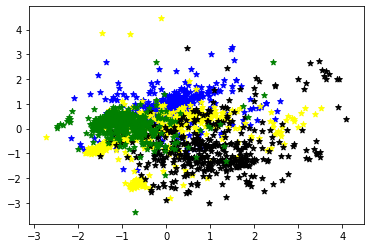

In [69]:
ada=RandomUnderSampler(ratio='not minority')
train, train_labels=ada.fit_sample(components, train_labels)
#test, test_labels=ada.fit_sample(X_test, y_test)

under_X_train = train
#X_test = test
under_y_train = train_labels
#y_test = test_labels
#input_size=X_train.shape[1]

plt.scatter(under_X_train[under_y_train == 'N'][:,0], under_X_train[under_y_train == 'N'][:,1],c='blue', marker='*',label='Normal')
plt.scatter(under_X_train[under_y_train == 'S'][:,0], under_X_train[under_y_train == 'S'][:,1],c='yellow', marker='*',label='SVEB')
plt.scatter(under_X_train[under_y_train == 'V'][:,0], under_X_train[under_y_train == 'V'][:,1],c='black', marker='*',label='V')
plt.scatter(under_X_train[under_y_train == 'F'][:,0], under_X_train[under_y_train == 'F'][:,1],c='Green', marker='*',label='F')

ValueError: all the input arrays must have same number of dimensions

Using Numpy backend.
